<a href="https://colab.research.google.com/github/Maicol54/Visualizacion---Trabajo-Practico/blob/main/Trabajo_Pr%C3%A1ctico_Visualizaci%C3%B3n_de_Datos_Maicol_Ardila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
from google.colab import files
def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    
    return df

In [2]:
# Se carga el archivo con la data

data = upload_files()
print(data.shape)
data.head()

Saving report (5).csv to report (5).csv
User uploaded file "report (5).csv" with length 29360235 bytes
(865352, 3)


,Unnamed: 0,timestamp_utc,Laayoune INVERTER IR3_INV2 act_pwr_val0
0,0,2021-09-01 02:00:00,0.0
1,1,2021-09-01 02:01:00,0.0
2,2,2021-09-01 02:02:00,0.0
3,3,2021-09-01 02:03:00,0.0
4,4,2021-09-01 02:04:00,0.0


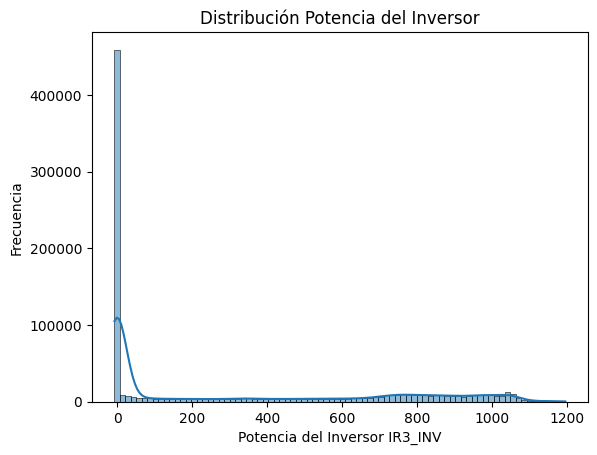

In [8]:
# Distribucion de la Potencia del Inversor

sns.histplot(data['Laayoune INVERTER IR3_INV2 act_pwr_val0'].dropna(), kde=True)
plt.title("Distribución Potencia del Inversor")
plt.xlabel('Potencia del Inversor IR3_INV')
plt.ylabel('Frecuencia')
plt.show()

Text(0, 0.5, 'Potencia del Inversor IR3_INV')

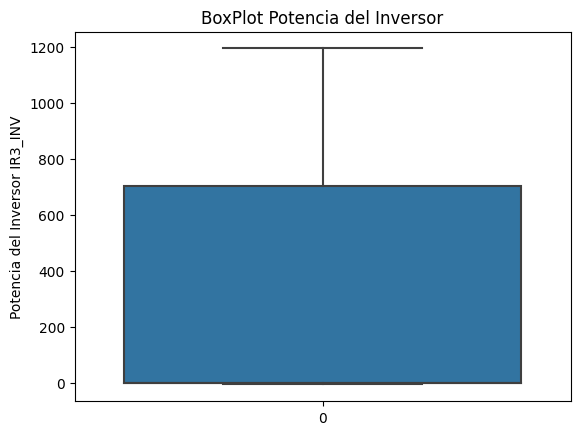

In [35]:
# BoxPlot de la Potencia del Inversor

sns.boxplot(data['Laayoune INVERTER IR3_INV2 act_pwr_val0'].dropna())
plt.title("BoxPlot Potencia del Inversor")
plt.ylabel('Potencia del Inversor IR3_INV')

Text(0, 0.5, 'Potencia del Inversor IR3_INV')

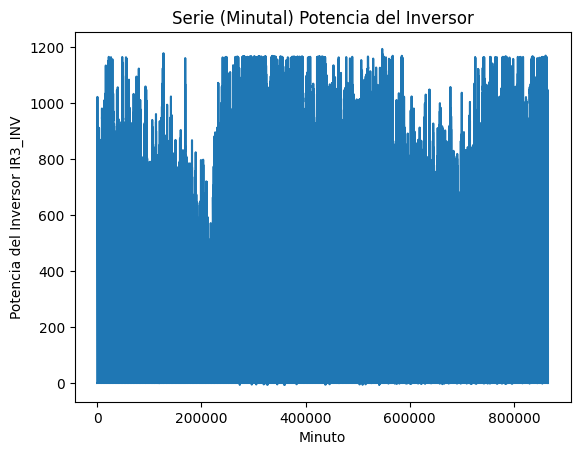

In [36]:
# Grafica de la serie por minuto

plt.plot(data['Laayoune INVERTER IR3_INV2 act_pwr_val0'].dropna())
plt.title("Serie (Minutal) Potencia del Inversor")
plt.xlabel('Minuto')
plt.ylabel('Potencia del Inversor IR3_INV')

In [17]:
# Pasamos el campo de fecha que esta en tipo texto a fecha quitando la hora.

data['timestamp_utc'] = pd.to_datetime(data['timestamp_utc']).dt.date

In [18]:
# Agrupamos los datos por dia

data_2 = data.groupby('timestamp_utc').mean('INVERTER IR3_INV2 act_pwr_val')

In [32]:
# Descargamos la data en un excel para pasar a la siguiente herramienta.

data_2.to_excel('data_diaria.xlsx')
files.download('data_diaria.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>